In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import json
import matplotlib
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV
from random import *
from math import log

from scipy.stats.stats import pearsonr   
%matplotlib inline

In [2]:
with open('dataset/business.json') as f:
    business_data = [json.loads(line) for line in f]
with open('dataset/user.json') as f:
    user_data = [json.loads(line) for line in f]

In [7]:
with open('dataset/review.json') as f:
    review_data = [json.loads(review) for review in f]

In [8]:
review_data

[{'business_id': 'uYHaNptLzDLoV_JZ_MuzUA',
  'cool': 0,
  'date': '2016-07-12',
  'funny': 0,
  'review_id': 'VfBHSwC5Vz_pbFluy07i9Q',
  'stars': 5,
  'text': 'My girlfriend and I stayed here for 3 nights and loved it. The location of this hotel and very decent price makes this an amazing deal. When you walk out the front door Scott Monument and Princes street are right in front of you, Edinburgh Castle and the Royal Mile is a 2 minute walk via a close right around the corner, and there are so many hidden gems nearby including Calton Hill and the newly opened Arches that made this location incredible.\n\nThe hotel itself was also very nice with a reasonably priced bar, very considerate staff, and small but comfortable rooms with excellent bathrooms and showers. Only two minor complaints are no telephones in room for room service (not a huge deal for us) and no AC in the room, but they have huge windows which can be fully opened. The staff were incredible though, letting us borrow umbre

In [9]:
from pandas.io.json import json_normalize
flatframe = json_normalize(business_data)

In [10]:
#flatframe.columns
#flatframe = flatframe[flatframe.columns.drop(list(flatframe.filter(regex='attributes')))]

In [11]:
flatframe = flatframe[flatframe.categories.map(lambda x: 'Restaurants' in x)]

In [12]:
flatframe

,address,attributes.AcceptsInsurance,attributes.AgesAllowed,attributes.Alcohol,attributes.Ambience.casual,attributes.Ambience.classy,attributes.Ambience.divey,attributes.Ambience.hipster,attributes.Ambience.intimate,attributes.Ambience.romantic,...,hours.Wednesday,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
1,2824 Milton Rd,NaN,NaN,NaN,False,False,False,False,False,False,...,10:00-22:00,0,35.236870,-80.741976,South Florida Style Chicken & Ribs,Eastland,28215,4,4.5,NC
4,4719 N 20Th St,NaN,NaN,none,False,False,False,False,False,False,...,NaN,0,33.505928,-112.038847,Blimpie,,85016,10,4.5,AZ
14,9616 E Independence Blvd,NaN,NaN,full_bar,False,False,False,False,False,False,...,11:00-0:00,1,35.135196,-80.714683,Applebee's,,28105,21,2.0,NC
15,190 E Dallas Rd,NaN,NaN,none,NaN,NaN,NaN,NaN,NaN,NaN,...,11:30-22:00,1,35.355085,-81.087268,China Garden,,28164,3,3.0,NC
21,4759 Liberty Ave,NaN,NaN,none,False,False,True,False,False,False,...,NaN,1,40.461350,-79.948113,Rocky's,Bloomfield,15224,15,3.0,PA
22,7070 Saint Barbara Boulevard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,43.639236,-79.716199,Wild Wing,Meadowvale Village,L5W 0E6,6,2.5,ON
31,4502 East Towne Blvd,NaN,NaN,full_bar,True,False,False,False,False,False,...,11:00-22:00,1,43.128034,-89.307157,Red Lobster,,53704,45,3.0,WI
32,1794 Liverpool Road,NaN,NaN,full_bar,True,False,NaN,False,False,False,...,NaN,1,43.834351,-79.090135,The Works,,L1V 1V9,41,3.0,ON
34,30 High Tech Rd,NaN,NaN,full_bar,True,False,NaN,False,False,False,...,11:00-0:00,1,43.841993,-79.429343,Milestones Restaurants,,L4B 4L9,51,2.5,ON
35,"280 W Beaver Creek Road, Unit 30",NaN,NaN,none,False,False,NaN,False,False,False,...,NaN,1,43.843475,-79.387686,Papa Chang's Tea Bistro,,L4B 3Z1,4,4.0,ON


In [99]:
#df_business = pd.read_json('dataset/business.json', lines=True)

In [119]:
flatframe.loc[flatframe['attributes.Ambience.romantic'] == True, 'stars'].mean()
#np.where(flatframe['attributes.Ambience.romantic']==True)

3.8166332665330662

In [116]:
flatframe['stars'].mean()

3.461104760428574

In [162]:
print(flatframe.loc[flatframe['attributes.DietaryRestrictions.kosher'] == True, 'stars'].mean())
print(flatframe.loc[flatframe['attributes.Ambience.trendy'] == True, 'stars'].mean())

4.125
3.7541642734060883


In [47]:
pd.set_option('display.max_columns', None)

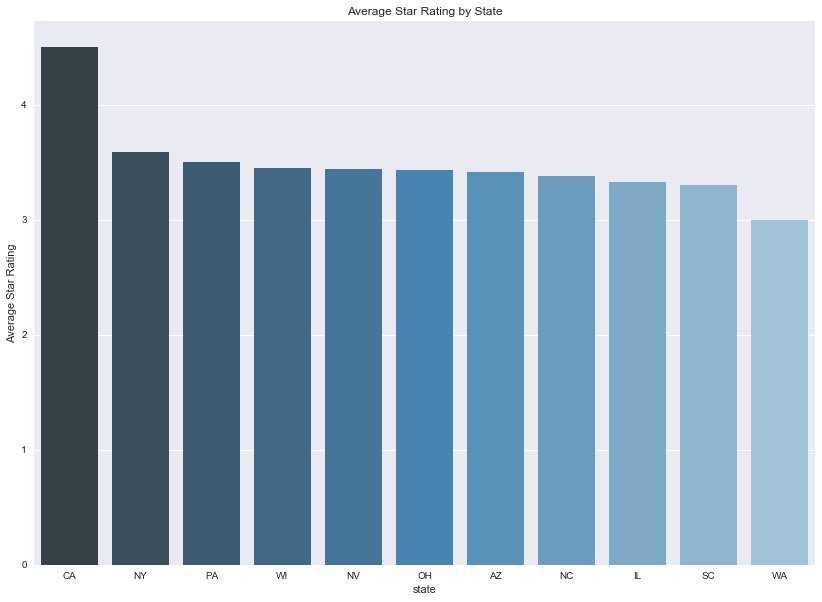

In [129]:
statemeans_df = flatframe.groupby('state', as_index=False)['stars'].mean()
statemeans_df = statemeans_df.sort_values(by=['stars'], ascending=False)
states = [ "AK","AL","AR","AS","AZ","CA","CO","CT","DC","DE","FL","GA","GU","HI","IA","ID","IL","IN",
"KS","KY","LA","MA","MD","ME","MI","MN","MO","MS","MT","NC","ND","NE","NH","NJ","NM","NV","NY","OH",
"OK","OR","PA","PR","RI","SC","SD","TN","TX","UT","VA","VI","VT","WA","WI","WV","WY"]
statemeans_df = statemeans_df[statemeans_df['state'].isin(states)]
fig, ax = plt.subplots(figsize=(14,10))
ax=sns.barplot(x='state',y='stars',palette="Blues_d", data=statemeans_df)
ax.set_ylabel('Average Star Rating')
ax.set_title('Average Star Rating by State')

In [166]:
len(flatframe.loc[flatframe['attributes.DietaryRestrictions.vegan'] == True, 'stars'])

118

/Users/PeterAyala/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


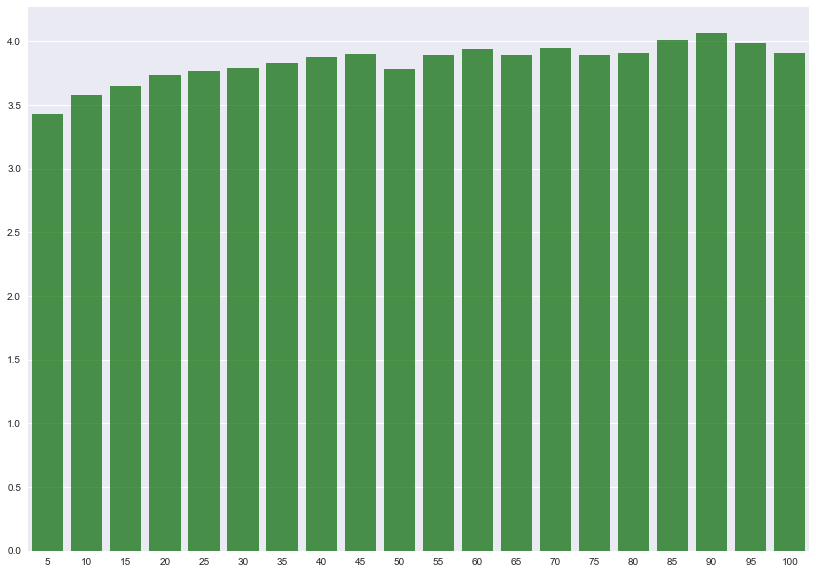

In [46]:
numbermeans_df = flatframe.groupby('review_count', as_index=False)['stars'].mean()
#plt.plot(numbermeans_df['review_count'], numbermeans_df['stars'])

slices = np.linspace(0, len(numbermeans_df), len(numbermeans_df)/45+1, True).astype(np.int)
counts = np.diff(slices)
mean = np.add.reduceat(numbermeans_df['stars'], slices[:-1]) / counts
fig, ax = plt.subplots(figsize=(14,10))
ax = sns.barplot(x=[x*10 for x in range(len(mean))], y=mean, color = 'green', alpha=0.75)
ax.set(xticklabels = [(x+1)*5 for x in range(21)]);

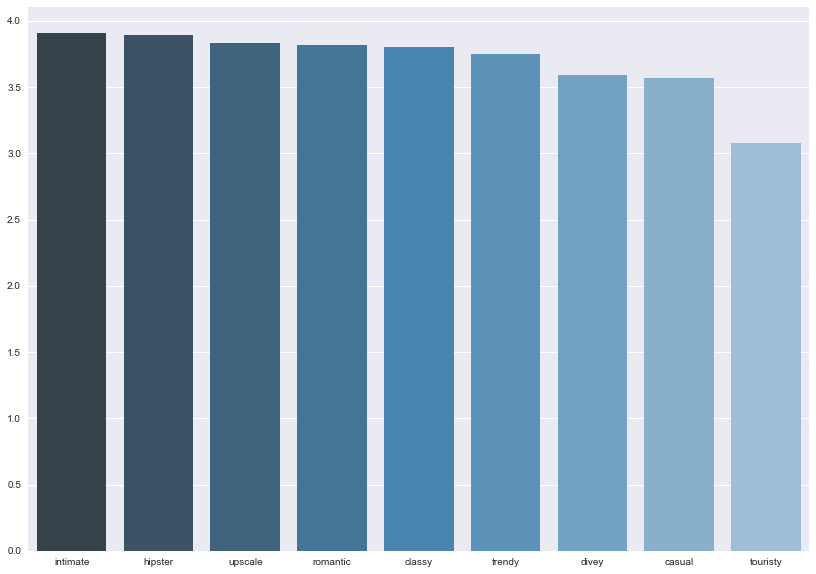

In [99]:
ambience_headers=flatframe.columns[4:13].values
ambience_dict = {}

for item in ambience_headers:
    trimmed_name = item[20:]
    ambience_dict[trimmed_name] = flatframe.loc[flatframe[item] == True, 'stars'].mean()

pairs = zip(list(ambience_dict.keys()), list(ambience_dict.values()))
pairs = sorted(pairs, key=lambda x: x[1], reverse=True)
ambiences, means = zip(*pairs)
fig, ax = plt.subplots(figsize=(14,10))
ax=sns.barplot(x=ambiences, y=means, palette='Blues_d')

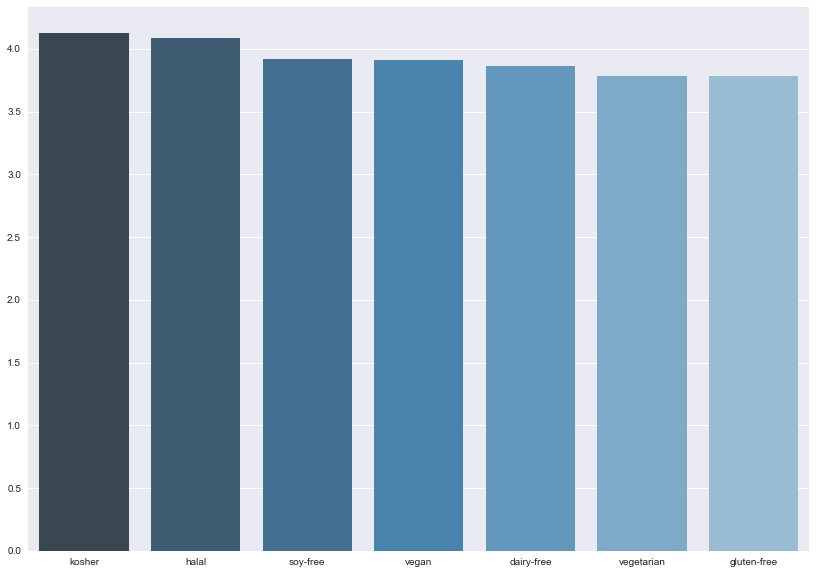

In [110]:
dietary_headers = flatframe.columns[34:41]
dietary_dict={}

for item in dietary_headers:
    trimmed_name = item[31:]
    dietary_dict[trimmed_name] = flatframe.loc[flatframe[item] == True, 'stars'].mean()

pairs = zip(list(dietary_dict.keys()), list(dietary_dict.values()))
pairs = sorted(pairs, key=lambda x: x[1], reverse=True)
dietaryrestrictions, means = zip(*pairs)
fig, ax = plt.subplots(figsize=(14,10))
ax=sns.barplot(x=dietaryrestrictions, y=means, palette='Blues_d')

In [124]:
restaurant_ids = flatframe.business_id.unique()

restaurant_reviews = [] 
counter=0
for x in review_data: 
    if counter % 100 == 0:
        print(counter)
    if x['business_id'] in restaurant_ids: 
        restaurant_reviews.append(x) 
    counter+=1

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

133000
133100
133200
133300
133400
133500
133600
133700
133800
133900
134000
134100
134200
134300
134400
134500
134600
134700
134800
134900
135000
135100
135200
135300
135400
135500
135600
135700
135800
135900
136000
136100
136200
136300
136400
136500
136600
136700
136800
136900
137000
137100
137200
137300
137400
137500
137600
137700
137800
137900
138000
138100
138200
138300
138400
138500
138600
138700
138800
138900
139000
139100
139200
139300
139400
139500
139600
139700
139800
139900
140000
140100
140200
140300
140400
140500
140600
140700
140800
140900
141000
141100
141200
141300
141400
141500
141600
141700
141800
141900
142000
142100
142200
142300
142400
142500
142600
142700
142800
142900
143000
143100
143200
143300
143400
143500
143600
143700
143800
143900
144000
144100
144200
144300
144400
144500
144600
144700
144800
144900
145000
145100
145200
145300
145400
145500
145600
145700
145800
145900
146000
146100
146200
146300
146400
146500
146600
146700
146800
146900
147000
147100
147200

250100
250200
250300
250400
250500
250600
250700
250800
250900
251000
251100
251200
251300
251400
251500
251600
251700
251800
251900
252000
252100
252200
252300
252400
252500
252600
252700
252800
252900
253000
253100
253200
253300
253400
253500
253600
253700
253800
253900
254000
254100
254200
254300
254400
254500
254600
254700
254800
254900
255000
255100
255200
255300
255400
255500
255600
255700
255800
255900
256000
256100
256200
256300
256400
256500
256600
256700
256800
256900
257000
257100
257200
257300
257400
257500
257600
257700
257800
257900
258000
258100
258200
258300
258400
258500
258600
258700
258800
258900
259000
259100
259200
259300
259400
259500
259600
259700
259800
259900
260000
260100
260200
260300
260400
260500
260600
260700
260800
260900
261000
261100
261200
261300
261400
261500
261600
261700
261800
261900
262000
262100
262200
262300
262400
262500
262600
262700
262800
262900
263000
263100
263200
263300
263400
263500
263600
263700
263800
263900
264000
264100
264200
264300

367200
367300
367400
367500
367600
367700
367800
367900
368000
368100
368200
368300
368400
368500
368600
368700
368800
368900
369000
369100
369200
369300
369400
369500
369600
369700
369800
369900
370000
370100
370200
370300
370400
370500
370600
370700
370800
370900
371000
371100
371200
371300
371400
371500
371600
371700
371800
371900
372000
372100
372200
372300
372400
372500
372600
372700
372800
372900
373000
373100
373200
373300
373400
373500
373600
373700
373800
373900
374000
374100
374200
374300
374400
374500
374600
374700
374800
374900
375000
375100
375200
375300
375400
375500
375600
375700
375800
375900
376000
376100
376200
376300
376400
376500
376600
376700
376800
376900
377000
377100
377200
377300
377400
377500
377600
377700
377800
377900
378000
378100
378200
378300
378400
378500
378600
378700
378800
378900
379000
379100
379200
379300
379400
379500
379600
379700
379800
379900
380000
380100
380200
380300
380400
380500
380600
380700
380800
380900
381000
381100
381200
381300
381400

484300
484400
484500
484600
484700
484800
484900
485000
485100
485200
485300
485400
485500
485600
485700
485800
485900
486000
486100
486200
486300
486400
486500
486600
486700
486800
486900
487000
487100
487200
487300
487400
487500
487600
487700
487800
487900
488000
488100
488200
488300
488400
488500
488600
488700
488800
488900
489000
489100
489200
489300
489400
489500
489600
489700
489800
489900
490000
490100
490200
490300
490400
490500
490600
490700
490800
490900
491000
491100
491200
491300
491400
491500
491600
491700
491800
491900
492000
492100
492200
492300
492400
492500
492600
492700
492800
492900
493000
493100
493200
493300
493400
493500
493600
493700
493800
493900
494000
494100
494200
494300
494400
494500
494600
494700
494800
494900
495000
495100
495200
495300
495400
495500
495600
495700
495800
495900
496000
496100
496200
496300
496400
496500
496600
496700
496800
496900
497000
497100
497200
497300
497400
497500
497600
497700
497800
497900
498000
498100
498200
498300
498400
498500

601400
601500
601600
601700
601800
601900
602000
602100
602200
602300
602400
602500
602600
602700
602800
602900
603000
603100
603200
603300
603400
603500
603600
603700
603800
603900
604000
604100
604200
604300
604400
604500
604600
604700
604800
604900
605000
605100
605200
605300
605400
605500
605600
605700
605800
605900
606000
606100
606200
606300
606400
606500
606600
606700
606800
606900
607000
607100
607200
607300
607400
607500
607600
607700
607800
607900
608000
608100
608200
608300
608400
608500
608600
608700
608800
608900
609000
609100
609200
609300
609400
609500
609600
609700
609800
609900
610000
610100
610200
610300
610400
610500
610600
610700
610800
610900
611000
611100
611200
611300
611400
611500
611600
611700
611800
611900
612000
612100
612200
612300
612400
612500
612600
612700
612800
612900
613000
613100
613200
613300
613400
613500
613600
613700
613800
613900
614000
614100
614200
614300
614400
614500
614600
614700
614800
614900
615000
615100
615200
615300
615400
615500
615600

718500
718600
718700
718800
718900
719000
719100
719200
719300
719400
719500
719600
719700
719800
719900
720000
720100
720200
720300
720400
720500
720600
720700
720800
720900
721000
721100
721200
721300
721400
721500
721600
721700
721800
721900
722000
722100
722200
722300
722400
722500
722600
722700
722800
722900
723000
723100
723200
723300
723400
723500
723600
723700
723800
723900
724000
724100
724200
724300
724400
724500
724600
724700
724800
724900
725000
725100
725200
725300
725400
725500
725600
725700
725800
725900
726000
726100
726200
726300
726400
726500
726600
726700
726800
726900
727000
727100
727200
727300
727400
727500
727600
727700
727800
727900
728000
728100
728200
728300
728400
728500
728600
728700
728800
728900
729000
729100
729200
729300
729400
729500
729600
729700
729800
729900
730000
730100
730200
730300
730400
730500
730600
730700
730800
730900
731000
731100
731200
731300
731400
731500
731600
731700
731800
731900
732000
732100
732200
732300
732400
732500
732600
732700

835600
835700
835800
835900
836000
836100
836200
836300
836400
836500
836600
836700
836800
836900
837000
837100
837200
837300
837400
837500
837600
837700
837800
837900
838000
838100
838200
838300
838400
838500
838600
838700
838800
838900
839000
839100
839200
839300
839400
839500
839600
839700
839800
839900
840000
840100
840200
840300
840400
840500
840600
840700
840800
840900
841000
841100
841200
841300
841400
841500
841600
841700
841800
841900
842000
842100
842200
842300
842400
842500
842600
842700
842800
842900
843000
843100
843200
843300
843400
843500
843600
843700
843800
843900
844000
844100
844200
844300
844400
844500
844600
844700
844800
844900
845000
845100
845200
845300
845400
845500
845600
845700
845800
845900
846000
846100
846200
846300
846400
846500
846600
846700
846800
846900
847000
847100
847200
847300
847400
847500
847600
847700
847800
847900
848000
848100
848200
848300
848400
848500
848600
848700
848800
848900
849000
849100
849200
849300
849400
849500
849600
849700
849800

952700
952800
952900
953000
953100
953200
953300
953400
953500
953600
953700
953800
953900
954000
954100
954200
954300
954400
954500
954600
954700
954800
954900
955000
955100
955200
955300
955400
955500
955600
955700
955800
955900
956000
956100
956200
956300
956400
956500
956600
956700
956800
956900
957000
957100
957200
957300
957400
957500
957600
957700
957800
957900
958000
958100
958200
958300
958400
958500
958600
958700
958800
958900
959000
959100
959200
959300
959400
959500
959600
959700
959800
959900
960000
960100
960200
960300
960400
960500
960600
960700
960800
960900
961000
961100
961200
961300
961400
961500
961600
961700
961800
961900
962000
962100
962200
962300
962400
962500
962600
962700
962800
962900
963000
963100
963200
963300
963400
963500
963600
963700
963800
963900
964000
964100
964200
964300
964400
964500
964600
964700
964800
964900
965000
965100
965200
965300
965400
965500
965600
965700
965800
965900
966000
966100
966200
966300
966400
966500
966600
966700
966800
966900

1061100
1061200
1061300
1061400
1061500
1061600
1061700
1061800
1061900
1062000
1062100
1062200
1062300
1062400
1062500
1062600
1062700
1062800
1062900
1063000
1063100
1063200
1063300
1063400
1063500
1063600
1063700
1063800
1063900
1064000
1064100
1064200
1064300
1064400
1064500
1064600
1064700
1064800
1064900
1065000
1065100
1065200
1065300
1065400
1065500
1065600
1065700
1065800
1065900
1066000
1066100
1066200
1066300
1066400
1066500
1066600
1066700
1066800
1066900
1067000
1067100
1067200
1067300
1067400
1067500
1067600
1067700
1067800
1067900
1068000
1068100
1068200
1068300
1068400
1068500
1068600
1068700
1068800
1068900
1069000
1069100
1069200
1069300
1069400
1069500
1069600
1069700
1069800
1069900
1070000
1070100
1070200
1070300
1070400
1070500
1070600
1070700
1070800
1070900
1071000
1071100
1071200
1071300
1071400
1071500
1071600
1071700
1071800
1071900
1072000
1072100
1072200
1072300
1072400
1072500
1072600
1072700
1072800
1072900
1073000
1073100
1073200
1073300
1073400
1073500


1163600
1163700
1163800
1163900
1164000
1164100
1164200
1164300
1164400
1164500
1164600
1164700
1164800
1164900
1165000
1165100
1165200
1165300
1165400
1165500
1165600
1165700
1165800
1165900
1166000
1166100
1166200
1166300
1166400
1166500
1166600
1166700
1166800
1166900
1167000
1167100
1167200
1167300
1167400
1167500
1167600
1167700
1167800
1167900
1168000
1168100
1168200
1168300
1168400
1168500
1168600
1168700
1168800
1168900
1169000
1169100
1169200
1169300
1169400
1169500
1169600
1169700
1169800
1169900
1170000
1170100
1170200
1170300
1170400
1170500
1170600
1170700
1170800
1170900
1171000
1171100
1171200
1171300
1171400
1171500
1171600
1171700
1171800
1171900
1172000
1172100
1172200
1172300
1172400
1172500
1172600
1172700
1172800
1172900
1173000
1173100
1173200
1173300
1173400
1173500
1173600
1173700
1173800
1173900
1174000
1174100
1174200
1174300
1174400
1174500
1174600
1174700
1174800
1174900
1175000
1175100
1175200
1175300
1175400
1175500
1175600
1175700
1175800
1175900
1176000


1266100
1266200
1266300
1266400
1266500
1266600
1266700
1266800
1266900
1267000
1267100
1267200
1267300
1267400
1267500
1267600
1267700
1267800
1267900
1268000
1268100
1268200
1268300
1268400
1268500
1268600
1268700
1268800
1268900
1269000
1269100
1269200
1269300
1269400
1269500
1269600
1269700
1269800
1269900
1270000
1270100
1270200
1270300
1270400
1270500
1270600
1270700
1270800
1270900
1271000
1271100
1271200
1271300
1271400
1271500
1271600
1271700
1271800
1271900
1272000
1272100
1272200
1272300
1272400
1272500
1272600
1272700
1272800
1272900
1273000
1273100
1273200
1273300
1273400
1273500
1273600
1273700
1273800
1273900
1274000
1274100
1274200
1274300
1274400
1274500
1274600
1274700
1274800
1274900
1275000
1275100
1275200
1275300
1275400
1275500
1275600
1275700
1275800
1275900
1276000
1276100
1276200
1276300
1276400
1276500
1276600
1276700
1276800
1276900
1277000
1277100
1277200
1277300
1277400
1277500
1277600
1277700
1277800
1277900
1278000
1278100
1278200
1278300
1278400
1278500


1368600
1368700
1368800
1368900
1369000
1369100
1369200
1369300
1369400
1369500
1369600
1369700
1369800
1369900
1370000
1370100
1370200
1370300
1370400
1370500
1370600
1370700
1370800
1370900
1371000
1371100
1371200
1371300
1371400
1371500
1371600
1371700
1371800
1371900
1372000
1372100
1372200
1372300
1372400
1372500
1372600
1372700
1372800
1372900
1373000
1373100
1373200
1373300
1373400
1373500
1373600
1373700
1373800
1373900
1374000
1374100
1374200
1374300
1374400
1374500
1374600
1374700
1374800
1374900
1375000
1375100
1375200
1375300
1375400
1375500
1375600
1375700
1375800
1375900
1376000
1376100
1376200
1376300
1376400
1376500
1376600
1376700
1376800
1376900
1377000
1377100
1377200
1377300
1377400
1377500
1377600
1377700
1377800
1377900
1378000
1378100
1378200
1378300
1378400
1378500
1378600
1378700
1378800
1378900
1379000
1379100
1379200
1379300
1379400
1379500
1379600
1379700
1379800
1379900
1380000
1380100
1380200
1380300
1380400
1380500
1380600
1380700
1380800
1380900
1381000


1471100
1471200
1471300
1471400
1471500
1471600
1471700
1471800
1471900
1472000
1472100
1472200
1472300
1472400
1472500
1472600
1472700
1472800
1472900
1473000
1473100
1473200
1473300
1473400
1473500
1473600
1473700
1473800
1473900
1474000
1474100
1474200
1474300
1474400
1474500
1474600
1474700
1474800
1474900
1475000
1475100
1475200
1475300
1475400
1475500
1475600
1475700
1475800
1475900
1476000
1476100
1476200
1476300
1476400
1476500
1476600
1476700
1476800
1476900
1477000
1477100
1477200
1477300
1477400
1477500
1477600
1477700
1477800
1477900
1478000
1478100
1478200
1478300
1478400
1478500
1478600
1478700
1478800
1478900
1479000
1479100
1479200
1479300
1479400
1479500
1479600
1479700
1479800
1479900
1480000
1480100
1480200
1480300
1480400
1480500
1480600
1480700
1480800
1480900
1481000
1481100
1481200
1481300
1481400
1481500
1481600
1481700
1481800
1481900
1482000
1482100
1482200
1482300
1482400
1482500
1482600
1482700
1482800
1482900
1483000
1483100
1483200
1483300
1483400
1483500


1573600
1573700
1573800
1573900
1574000
1574100
1574200
1574300
1574400
1574500
1574600
1574700
1574800
1574900
1575000
1575100
1575200
1575300
1575400
1575500
1575600
1575700
1575800
1575900
1576000
1576100
1576200
1576300
1576400
1576500
1576600
1576700
1576800
1576900
1577000
1577100
1577200
1577300
1577400
1577500
1577600
1577700
1577800
1577900
1578000
1578100
1578200
1578300
1578400
1578500
1578600
1578700
1578800
1578900
1579000
1579100
1579200
1579300
1579400
1579500
1579600
1579700
1579800
1579900
1580000
1580100
1580200
1580300
1580400
1580500
1580600
1580700
1580800
1580900
1581000
1581100
1581200
1581300
1581400
1581500
1581600
1581700
1581800
1581900
1582000
1582100
1582200
1582300
1582400
1582500
1582600
1582700
1582800
1582900
1583000
1583100
1583200
1583300
1583400
1583500
1583600
1583700
1583800
1583900
1584000
1584100
1584200
1584300
1584400
1584500
1584600
1584700
1584800
1584900
1585000
1585100
1585200
1585300
1585400
1585500
1585600
1585700
1585800
1585900
1586000


1676100
1676200
1676300
1676400
1676500
1676600
1676700
1676800
1676900
1677000
1677100
1677200
1677300
1677400
1677500
1677600
1677700
1677800
1677900
1678000
1678100
1678200
1678300
1678400
1678500
1678600
1678700
1678800
1678900
1679000
1679100
1679200
1679300
1679400
1679500
1679600
1679700
1679800
1679900
1680000
1680100
1680200
1680300
1680400
1680500
1680600
1680700
1680800
1680900
1681000
1681100
1681200
1681300
1681400
1681500
1681600
1681700
1681800
1681900
1682000
1682100
1682200
1682300
1682400
1682500
1682600
1682700
1682800
1682900
1683000
1683100
1683200
1683300
1683400
1683500
1683600
1683700
1683800
1683900
1684000
1684100
1684200
1684300
1684400
1684500
1684600
1684700
1684800
1684900
1685000
1685100
1685200
1685300
1685400
1685500
1685600
1685700
1685800
1685900
1686000
1686100
1686200
1686300
1686400
1686500
1686600
1686700
1686800
1686900
1687000
1687100
1687200
1687300
1687400
1687500
1687600
1687700
1687800
1687900
1688000
1688100
1688200
1688300
1688400
1688500


1778600
1778700
1778800
1778900
1779000
1779100
1779200
1779300
1779400
1779500
1779600
1779700
1779800
1779900
1780000
1780100
1780200
1780300
1780400
1780500
1780600
1780700
1780800
1780900
1781000
1781100
1781200
1781300
1781400
1781500
1781600
1781700
1781800
1781900
1782000
1782100
1782200
1782300
1782400
1782500
1782600
1782700
1782800
1782900
1783000
1783100
1783200
1783300
1783400
1783500
1783600
1783700
1783800
1783900
1784000
1784100
1784200
1784300
1784400
1784500
1784600
1784700
1784800
1784900
1785000
1785100
1785200
1785300
1785400
1785500
1785600
1785700
1785800
1785900
1786000
1786100
1786200
1786300
1786400
1786500
1786600
1786700
1786800
1786900
1787000
1787100
1787200
1787300
1787400
1787500
1787600
1787700
1787800
1787900
1788000
1788100
1788200
1788300
1788400
1788500
1788600
1788700
1788800
1788900
1789000
1789100
1789200
1789300
1789400
1789500
1789600
1789700
1789800
1789900
1790000
1790100
1790200
1790300
1790400
1790500
1790600
1790700
1790800
1790900
1791000


1881100
1881200
1881300
1881400
1881500
1881600
1881700
1881800
1881900
1882000
1882100
1882200
1882300
1882400
1882500
1882600
1882700
1882800
1882900
1883000
1883100
1883200
1883300
1883400
1883500
1883600
1883700
1883800
1883900
1884000
1884100
1884200
1884300
1884400
1884500
1884600
1884700
1884800
1884900
1885000
1885100
1885200
1885300
1885400
1885500
1885600
1885700
1885800
1885900
1886000
1886100
1886200
1886300
1886400
1886500
1886600
1886700
1886800
1886900
1887000
1887100
1887200
1887300
1887400
1887500
1887600
1887700
1887800
1887900
1888000
1888100
1888200
1888300
1888400
1888500
1888600
1888700
1888800
1888900
1889000
1889100
1889200
1889300
1889400
1889500
1889600
1889700
1889800
1889900
1890000
1890100
1890200
1890300
1890400
1890500
1890600
1890700
1890800
1890900
1891000
1891100
1891200
1891300
1891400
1891500
1891600
1891700
1891800
1891900
1892000
1892100
1892200
1892300
1892400
1892500
1892600
1892700
1892800
1892900
1893000
1893100
1893200
1893300
1893400
1893500


1983600
1983700
1983800
1983900
1984000
1984100
1984200
1984300
1984400
1984500
1984600
1984700
1984800
1984900
1985000
1985100
1985200
1985300
1985400
1985500
1985600
1985700
1985800
1985900
1986000
1986100
1986200
1986300
1986400
1986500
1986600
1986700
1986800
1986900
1987000
1987100
1987200
1987300
1987400
1987500
1987600
1987700
1987800
1987900
1988000
1988100
1988200
1988300
1988400
1988500
1988600
1988700
1988800
1988900
1989000
1989100
1989200
1989300
1989400
1989500
1989600
1989700
1989800
1989900
1990000
1990100
1990200
1990300
1990400
1990500
1990600
1990700
1990800
1990900
1991000
1991100
1991200
1991300
1991400
1991500
1991600
1991700
1991800
1991900
1992000
1992100
1992200
1992300
1992400
1992500
1992600
1992700
1992800
1992900
1993000
1993100
1993200
1993300
1993400
1993500
1993600
1993700
1993800
1993900
1994000
1994100
1994200
1994300
1994400
1994500
1994600
1994700
1994800
1994900
1995000
1995100
1995200
1995300
1995400
1995500
1995600
1995700
1995800
1995900
1996000


2086100
2086200
2086300
2086400
2086500
2086600
2086700
2086800
2086900
2087000
2087100
2087200
2087300
2087400
2087500
2087600
2087700
2087800
2087900
2088000
2088100
2088200
2088300
2088400
2088500
2088600
2088700
2088800
2088900
2089000
2089100
2089200
2089300
2089400
2089500
2089600
2089700
2089800
2089900
2090000
2090100
2090200
2090300
2090400
2090500
2090600
2090700
2090800
2090900
2091000
2091100
2091200
2091300
2091400
2091500
2091600
2091700
2091800
2091900
2092000
2092100
2092200
2092300
2092400
2092500
2092600
2092700
2092800
2092900
2093000
2093100
2093200
2093300
2093400
2093500
2093600
2093700
2093800
2093900
2094000
2094100
2094200
2094300
2094400
2094500
2094600
2094700
2094800
2094900
2095000
2095100
2095200
2095300
2095400
2095500
2095600
2095700
2095800
2095900
2096000
2096100
2096200
2096300
2096400
2096500
2096600
2096700
2096800
2096900
2097000
2097100
2097200
2097300
2097400
2097500
2097600
2097700
2097800
2097900
2098000
2098100
2098200
2098300
2098400
2098500


2188600
2188700
2188800
2188900
2189000
2189100
2189200
2189300
2189400
2189500
2189600
2189700
2189800
2189900
2190000
2190100
2190200
2190300
2190400
2190500
2190600
2190700
2190800
2190900
2191000
2191100
2191200
2191300
2191400
2191500
2191600
2191700
2191800
2191900
2192000
2192100
2192200
2192300
2192400
2192500
2192600
2192700
2192800
2192900
2193000
2193100
2193200
2193300
2193400
2193500
2193600
2193700
2193800
2193900
2194000
2194100
2194200
2194300
2194400
2194500
2194600
2194700
2194800
2194900
2195000
2195100
2195200
2195300
2195400
2195500
2195600
2195700
2195800
2195900
2196000
2196100
2196200
2196300
2196400
2196500
2196600
2196700
2196800
2196900
2197000
2197100
2197200
2197300
2197400
2197500
2197600
2197700
2197800
2197900
2198000
2198100
2198200
2198300
2198400
2198500
2198600
2198700
2198800
2198900
2199000
2199100
2199200
2199300
2199400
2199500
2199600
2199700
2199800
2199900
2200000
2200100
2200200
2200300
2200400
2200500
2200600
2200700
2200800
2200900
2201000


2291100
2291200
2291300
2291400
2291500
2291600
2291700
2291800
2291900
2292000
2292100
2292200
2292300
2292400
2292500
2292600
2292700
2292800
2292900
2293000
2293100
2293200
2293300
2293400
2293500
2293600
2293700
2293800
2293900
2294000
2294100
2294200
2294300
2294400
2294500
2294600
2294700
2294800
2294900
2295000
2295100
2295200
2295300
2295400
2295500
2295600
2295700
2295800
2295900
2296000
2296100
2296200
2296300
2296400
2296500
2296600
2296700
2296800
2296900
2297000
2297100
2297200
2297300
2297400
2297500
2297600
2297700
2297800
2297900
2298000
2298100
2298200
2298300
2298400
2298500
2298600
2298700
2298800
2298900
2299000
2299100
2299200
2299300
2299400
2299500
2299600
2299700
2299800
2299900
2300000
2300100
2300200
2300300
2300400
2300500
2300600
2300700
2300800
2300900
2301000
2301100
2301200
2301300
2301400
2301500
2301600
2301700
2301800
2301900
2302000
2302100
2302200
2302300
2302400
2302500
2302600
2302700
2302800
2302900
2303000
2303100
2303200
2303300
2303400
2303500


2393600
2393700
2393800
2393900
2394000
2394100
2394200
2394300
2394400
2394500
2394600
2394700
2394800
2394900
2395000
2395100
2395200
2395300
2395400
2395500
2395600
2395700
2395800
2395900
2396000
2396100
2396200
2396300
2396400
2396500
2396600
2396700
2396800
2396900
2397000
2397100
2397200
2397300
2397400
2397500
2397600
2397700
2397800
2397900
2398000
2398100
2398200
2398300
2398400
2398500
2398600
2398700
2398800
2398900
2399000
2399100
2399200
2399300
2399400
2399500
2399600
2399700
2399800
2399900
2400000
2400100
2400200
2400300
2400400
2400500
2400600
2400700
2400800
2400900
2401000
2401100
2401200
2401300
2401400
2401500
2401600
2401700
2401800
2401900
2402000
2402100
2402200
2402300
2402400
2402500
2402600
2402700
2402800
2402900
2403000
2403100
2403200
2403300
2403400
2403500
2403600
2403700
2403800
2403900
2404000
2404100
2404200
2404300
2404400
2404500
2404600
2404700
2404800
2404900
2405000
2405100
2405200
2405300
2405400
2405500
2405600
2405700
2405800
2405900
2406000


2496100
2496200
2496300
2496400
2496500
2496600
2496700
2496800
2496900
2497000
2497100
2497200
2497300
2497400
2497500
2497600
2497700
2497800
2497900
2498000
2498100
2498200
2498300
2498400
2498500
2498600
2498700
2498800
2498900
2499000
2499100
2499200
2499300
2499400
2499500
2499600
2499700
2499800
2499900
2500000
2500100
2500200
2500300
2500400
2500500
2500600
2500700
2500800
2500900
2501000
2501100
2501200
2501300
2501400
2501500
2501600
2501700
2501800
2501900
2502000
2502100
2502200
2502300
2502400
2502500
2502600
2502700
2502800
2502900
2503000
2503100
2503200
2503300
2503400
2503500
2503600
2503700
2503800
2503900
2504000
2504100
2504200
2504300
2504400
2504500
2504600
2504700
2504800
2504900
2505000
2505100
2505200
2505300
2505400
2505500
2505600
2505700
2505800
2505900
2506000
2506100
2506200
2506300
2506400
2506500
2506600
2506700
2506800
2506900
2507000
2507100
2507200
2507300
2507400
2507500
2507600
2507700
2507800
2507900
2508000
2508100
2508200
2508300
2508400
2508500


2598600
2598700
2598800
2598900
2599000
2599100
2599200
2599300
2599400
2599500
2599600
2599700
2599800
2599900
2600000
2600100
2600200
2600300
2600400
2600500
2600600
2600700
2600800
2600900
2601000
2601100
2601200
2601300
2601400
2601500
2601600
2601700
2601800
2601900
2602000
2602100
2602200
2602300
2602400
2602500
2602600
2602700
2602800
2602900
2603000
2603100
2603200
2603300
2603400
2603500
2603600
2603700
2603800
2603900
2604000
2604100
2604200
2604300
2604400
2604500
2604600
2604700
2604800
2604900
2605000
2605100
2605200
2605300
2605400
2605500
2605600
2605700
2605800
2605900
2606000
2606100
2606200
2606300
2606400
2606500
2606600
2606700
2606800
2606900
2607000
2607100
2607200
2607300
2607400
2607500
2607600
2607700
2607800
2607900
2608000
2608100
2608200
2608300
2608400
2608500
2608600
2608700
2608800
2608900
2609000
2609100
2609200
2609300
2609400
2609500
2609600
2609700
2609800
2609900
2610000
2610100
2610200
2610300
2610400
2610500
2610600
2610700
2610800
2610900
2611000


2701100
2701200
2701300
2701400
2701500
2701600
2701700
2701800
2701900
2702000
2702100
2702200
2702300
2702400
2702500
2702600
2702700
2702800
2702900
2703000
2703100
2703200
2703300
2703400
2703500
2703600
2703700
2703800
2703900
2704000
2704100
2704200
2704300
2704400
2704500
2704600
2704700
2704800
2704900
2705000
2705100
2705200
2705300
2705400
2705500
2705600
2705700
2705800
2705900
2706000
2706100
2706200
2706300
2706400
2706500
2706600
2706700
2706800
2706900
2707000
2707100
2707200
2707300
2707400
2707500
2707600
2707700
2707800
2707900
2708000
2708100
2708200
2708300
2708400
2708500
2708600
2708700
2708800
2708900
2709000
2709100
2709200
2709300
2709400
2709500
2709600
2709700
2709800
2709900
2710000
2710100
2710200
2710300
2710400
2710500
2710600
2710700
2710800
2710900
2711000
2711100
2711200
2711300
2711400
2711500
2711600
2711700
2711800
2711900
2712000
2712100
2712200
2712300
2712400
2712500
2712600
2712700
2712800
2712900
2713000
2713100
2713200
2713300
2713400
2713500


2803600
2803700
2803800
2803900
2804000
2804100
2804200
2804300
2804400
2804500
2804600
2804700
2804800
2804900
2805000
2805100
2805200
2805300
2805400
2805500
2805600
2805700
2805800
2805900
2806000
2806100
2806200
2806300
2806400
2806500
2806600
2806700
2806800
2806900
2807000
2807100
2807200
2807300
2807400
2807500
2807600
2807700
2807800
2807900
2808000
2808100
2808200
2808300
2808400
2808500
2808600
2808700
2808800
2808900
2809000
2809100
2809200
2809300
2809400
2809500
2809600
2809700
2809800
2809900
2810000
2810100
2810200
2810300
2810400
2810500
2810600
2810700
2810800
2810900
2811000
2811100
2811200
2811300
2811400
2811500
2811600
2811700
2811800
2811900
2812000
2812100
2812200
2812300
2812400
2812500
2812600
2812700
2812800
2812900
2813000
2813100
2813200
2813300
2813400
2813500
2813600
2813700
2813800
2813900
2814000
2814100
2814200
2814300
2814400
2814500
2814600
2814700
2814800
2814900
2815000
2815100
2815200
2815300
2815400
2815500
2815600
2815700
2815800
2815900
2816000


2906100
2906200
2906300
2906400
2906500
2906600
2906700
2906800
2906900
2907000
2907100
2907200
2907300
2907400
2907500
2907600
2907700
2907800
2907900
2908000
2908100
2908200
2908300
2908400
2908500
2908600
2908700
2908800
2908900
2909000
2909100
2909200
2909300
2909400
2909500
2909600
2909700
2909800
2909900
2910000
2910100
2910200
2910300
2910400
2910500
2910600
2910700
2910800
2910900
2911000
2911100
2911200
2911300
2911400
2911500
2911600
2911700
2911800
2911900
2912000
2912100
2912200
2912300
2912400
2912500
2912600
2912700
2912800
2912900
2913000
2913100
2913200
2913300
2913400
2913500
2913600
2913700
2913800
2913900
2914000
2914100
2914200
2914300
2914400
2914500
2914600
2914700
2914800
2914900
2915000
2915100
2915200
2915300
2915400
2915500
2915600
2915700
2915800
2915900
2916000
2916100
2916200
2916300
2916400
2916500
2916600
2916700
2916800
2916900
2917000
2917100
2917200
2917300
2917400
2917500
2917600
2917700
2917800
2917900
2918000
2918100
2918200
2918300
2918400
2918500


3008600
3008700
3008800
3008900
3009000
3009100
3009200
3009300
3009400
3009500
3009600
3009700
3009800
3009900
3010000
3010100
3010200
3010300
3010400
3010500
3010600
3010700
3010800
3010900
3011000
3011100
3011200
3011300
3011400
3011500
3011600
3011700
3011800
3011900
3012000
3012100
3012200
3012300
3012400
3012500
3012600
3012700
3012800
3012900
3013000
3013100
3013200
3013300
3013400
3013500
3013600
3013700
3013800
3013900
3014000
3014100
3014200
3014300
3014400
3014500
3014600
3014700
3014800
3014900
3015000
3015100
3015200
3015300
3015400
3015500
3015600
3015700
3015800
3015900
3016000
3016100
3016200
3016300
3016400
3016500
3016600
3016700
3016800
3016900
3017000
3017100
3017200
3017300
3017400
3017500
3017600
3017700
3017800
3017900
3018000
3018100
3018200
3018300
3018400
3018500
3018600
3018700
3018800
3018900
3019000
3019100
3019200
3019300
3019400
3019500
3019600
3019700
3019800
3019900
3020000
3020100
3020200
3020300
3020400
3020500
3020600
3020700
3020800
3020900
3021000


3111100
3111200
3111300
3111400
3111500
3111600
3111700
3111800
3111900
3112000
3112100
3112200
3112300
3112400
3112500
3112600
3112700
3112800
3112900
3113000
3113100
3113200
3113300
3113400
3113500
3113600
3113700
3113800
3113900
3114000
3114100
3114200
3114300
3114400
3114500
3114600
3114700
3114800
3114900
3115000
3115100
3115200
3115300
3115400
3115500
3115600
3115700
3115800
3115900
3116000
3116100
3116200
3116300
3116400
3116500
3116600
3116700
3116800
3116900
3117000
3117100
3117200
3117300
3117400
3117500
3117600
3117700
3117800
3117900
3118000
3118100
3118200
3118300
3118400
3118500
3118600
3118700
3118800
3118900
3119000
3119100
3119200
3119300
3119400
3119500
3119600
3119700
3119800
3119900
3120000
3120100
3120200
3120300
3120400
3120500
3120600
3120700
3120800
3120900
3121000
3121100
3121200
3121300
3121400
3121500
3121600
3121700
3121800
3121900
3122000
3122100
3122200
3122300
3122400
3122500
3122600
3122700
3122800
3122900
3123000
3123100
3123200
3123300
3123400
3123500


3213600
3213700
3213800
3213900
3214000
3214100
3214200
3214300
3214400
3214500
3214600
3214700
3214800
3214900
3215000
3215100
3215200
3215300
3215400
3215500
3215600
3215700
3215800
3215900
3216000
3216100
3216200
3216300
3216400
3216500
3216600
3216700
3216800
3216900
3217000
3217100
3217200
3217300
3217400
3217500
3217600
3217700
3217800
3217900
3218000
3218100
3218200
3218300
3218400
3218500
3218600
3218700
3218800
3218900
3219000
3219100
3219200
3219300
3219400
3219500
3219600
3219700
3219800
3219900
3220000
3220100
3220200
3220300
3220400
3220500
3220600
3220700
3220800
3220900
3221000
3221100
3221200
3221300
3221400
3221500
3221600
3221700
3221800
3221900
3222000
3222100
3222200
3222300
3222400
3222500
3222600
3222700
3222800
3222900
3223000
3223100
3223200
3223300
3223400
3223500
3223600
3223700
3223800
3223900
3224000
3224100
3224200
3224300
3224400
3224500
3224600
3224700
3224800
3224900
3225000
3225100
3225200
3225300
3225400
3225500
3225600
3225700
3225800
3225900
3226000


3316100
3316200
3316300
3316400
3316500
3316600
3316700
3316800
3316900
3317000
3317100
3317200
3317300
3317400
3317500
3317600
3317700
3317800
3317900
3318000
3318100
3318200
3318300
3318400
3318500
3318600
3318700
3318800
3318900
3319000
3319100
3319200
3319300
3319400
3319500
3319600
3319700
3319800
3319900
3320000
3320100
3320200
3320300
3320400
3320500
3320600
3320700
3320800
3320900
3321000
3321100
3321200
3321300
3321400
3321500
3321600
3321700
3321800
3321900
3322000
3322100
3322200
3322300
3322400
3322500
3322600
3322700
3322800
3322900
3323000
3323100
3323200
3323300
3323400
3323500
3323600
3323700
3323800
3323900
3324000
3324100
3324200
3324300
3324400
3324500
3324600
3324700
3324800
3324900
3325000
3325100
3325200
3325300
3325400
3325500
3325600
3325700
3325800
3325900
3326000
3326100
3326200
3326300
3326400
3326500
3326600
3326700
3326800
3326900
3327000
3327100
3327200
3327300
3327400
3327500
3327600
3327700
3327800
3327900
3328000
3328100
3328200
3328300
3328400
3328500


3418600
3418700
3418800
3418900
3419000
3419100
3419200
3419300
3419400
3419500
3419600
3419700
3419800
3419900
3420000
3420100
3420200
3420300
3420400
3420500
3420600
3420700
3420800
3420900
3421000
3421100
3421200
3421300
3421400
3421500
3421600
3421700
3421800
3421900
3422000
3422100
3422200
3422300
3422400
3422500
3422600
3422700
3422800
3422900
3423000
3423100
3423200
3423300
3423400
3423500
3423600
3423700
3423800
3423900
3424000
3424100
3424200
3424300
3424400
3424500
3424600
3424700
3424800
3424900
3425000
3425100
3425200
3425300
3425400
3425500
3425600
3425700
3425800
3425900
3426000
3426100
3426200
3426300
3426400
3426500
3426600
3426700
3426800
3426900
3427000
3427100
3427200
3427300
3427400
3427500
3427600
3427700
3427800
3427900
3428000
3428100
3428200
3428300
3428400
3428500
3428600
3428700
3428800
3428900
3429000
3429100
3429200
3429300
3429400
3429500
3429600
3429700
3429800
3429900
3430000
3430100
3430200
3430300
3430400
3430500
3430600
3430700
3430800
3430900
3431000


3521100
3521200
3521300
3521400
3521500
3521600
3521700
3521800
3521900
3522000
3522100
3522200
3522300
3522400
3522500
3522600
3522700
3522800
3522900
3523000
3523100
3523200
3523300
3523400
3523500
3523600
3523700
3523800
3523900
3524000
3524100
3524200
3524300
3524400
3524500
3524600
3524700
3524800
3524900
3525000
3525100
3525200
3525300
3525400
3525500
3525600
3525700
3525800
3525900
3526000
3526100
3526200
3526300
3526400
3526500
3526600
3526700
3526800
3526900
3527000
3527100
3527200
3527300
3527400
3527500
3527600
3527700
3527800
3527900
3528000
3528100
3528200
3528300
3528400
3528500
3528600
3528700
3528800
3528900
3529000
3529100
3529200
3529300
3529400
3529500
3529600
3529700
3529800
3529900
3530000
3530100
3530200
3530300
3530400
3530500
3530600
3530700
3530800
3530900
3531000
3531100
3531200
3531300
3531400
3531500
3531600
3531700
3531800
3531900
3532000
3532100
3532200
3532300
3532400
3532500
3532600
3532700
3532800
3532900
3533000
3533100
3533200
3533300
3533400
3533500


3623600
3623700
3623800
3623900
3624000
3624100
3624200
3624300
3624400
3624500
3624600
3624700
3624800
3624900
3625000
3625100
3625200
3625300
3625400
3625500
3625600
3625700
3625800
3625900
3626000
3626100
3626200
3626300
3626400
3626500
3626600
3626700
3626800
3626900
3627000
3627100
3627200
3627300
3627400
3627500
3627600
3627700
3627800
3627900
3628000
3628100
3628200
3628300
3628400
3628500
3628600
3628700
3628800
3628900
3629000
3629100
3629200
3629300
3629400
3629500
3629600
3629700
3629800
3629900
3630000
3630100
3630200
3630300
3630400
3630500
3630600
3630700
3630800
3630900
3631000
3631100
3631200
3631300
3631400
3631500
3631600
3631700
3631800
3631900
3632000
3632100
3632200
3632300
3632400
3632500
3632600
3632700
3632800
3632900
3633000
3633100
3633200
3633300
3633400
3633500
3633600
3633700
3633800
3633900
3634000
3634100
3634200
3634300
3634400
3634500
3634600
3634700
3634800
3634900
3635000
3635100
3635200
3635300
3635400
3635500
3635600
3635700
3635800
3635900
3636000


3726100
3726200
3726300
3726400
3726500
3726600
3726700
3726800
3726900
3727000
3727100
3727200
3727300
3727400
3727500
3727600
3727700
3727800
3727900
3728000
3728100
3728200
3728300
3728400
3728500
3728600
3728700
3728800
3728900
3729000
3729100
3729200
3729300
3729400
3729500
3729600
3729700
3729800
3729900
3730000
3730100
3730200
3730300
3730400
3730500
3730600
3730700
3730800
3730900
3731000
3731100
3731200
3731300
3731400
3731500
3731600
3731700
3731800
3731900
3732000
3732100
3732200
3732300
3732400
3732500
3732600
3732700
3732800
3732900
3733000
3733100
3733200
3733300
3733400
3733500
3733600
3733700
3733800
3733900
3734000
3734100
3734200
3734300
3734400
3734500
3734600
3734700
3734800
3734900
3735000
3735100
3735200
3735300
3735400
3735500
3735600
3735700
3735800
3735900
3736000
3736100
3736200
3736300
3736400
3736500
3736600
3736700
3736800
3736900
3737000
3737100
3737200
3737300
3737400
3737500
3737600
3737700
3737800
3737900
3738000
3738100
3738200
3738300
3738400
3738500


3828600
3828700
3828800
3828900
3829000
3829100
3829200
3829300
3829400
3829500
3829600
3829700
3829800
3829900
3830000
3830100
3830200
3830300
3830400
3830500
3830600
3830700
3830800
3830900
3831000
3831100
3831200
3831300
3831400
3831500
3831600
3831700
3831800
3831900
3832000
3832100
3832200
3832300
3832400
3832500
3832600
3832700
3832800
3832900
3833000
3833100
3833200
3833300
3833400
3833500
3833600
3833700
3833800
3833900
3834000
3834100
3834200
3834300
3834400
3834500
3834600
3834700
3834800
3834900
3835000
3835100
3835200
3835300
3835400
3835500
3835600
3835700
3835800
3835900
3836000
3836100
3836200
3836300
3836400
3836500
3836600
3836700
3836800
3836900
3837000
3837100
3837200
3837300
3837400
3837500
3837600
3837700
3837800
3837900
3838000
3838100
3838200
3838300
3838400
3838500
3838600
3838700
3838800
3838900
3839000
3839100
3839200
3839300
3839400
3839500
3839600
3839700
3839800
3839900
3840000
3840100
3840200
3840300
3840400
3840500
3840600
3840700
3840800
3840900
3841000


3931100
3931200
3931300
3931400
3931500
3931600
3931700
3931800
3931900
3932000
3932100
3932200
3932300
3932400
3932500
3932600
3932700
3932800
3932900
3933000
3933100
3933200
3933300
3933400
3933500
3933600
3933700
3933800
3933900
3934000
3934100
3934200
3934300
3934400
3934500
3934600
3934700
3934800
3934900
3935000
3935100
3935200
3935300
3935400
3935500
3935600
3935700
3935800
3935900
3936000
3936100
3936200
3936300
3936400
3936500
3936600
3936700
3936800
3936900
3937000
3937100
3937200
3937300
3937400
3937500
3937600
3937700
3937800
3937900
3938000
3938100
3938200
3938300
3938400
3938500
3938600
3938700
3938800
3938900
3939000
3939100
3939200
3939300
3939400
3939500
3939600
3939700
3939800
3939900
3940000
3940100
3940200
3940300
3940400
3940500
3940600
3940700
3940800
3940900
3941000
3941100
3941200
3941300
3941400
3941500
3941600
3941700
3941800
3941900
3942000
3942100
3942200
3942300
3942400
3942500
3942600
3942700
3942800
3942900
3943000
3943100
3943200
3943300
3943400
3943500


4033600
4033700
4033800
4033900
4034000
4034100
4034200
4034300
4034400
4034500
4034600
4034700
4034800
4034900
4035000
4035100
4035200
4035300
4035400
4035500
4035600
4035700
4035800
4035900
4036000
4036100
4036200
4036300
4036400
4036500
4036600
4036700
4036800
4036900
4037000
4037100
4037200
4037300
4037400
4037500
4037600
4037700
4037800
4037900
4038000
4038100
4038200
4038300
4038400
4038500
4038600
4038700
4038800
4038900
4039000
4039100
4039200
4039300
4039400
4039500
4039600
4039700
4039800
4039900
4040000
4040100
4040200
4040300
4040400
4040500
4040600
4040700
4040800
4040900
4041000
4041100
4041200
4041300
4041400
4041500
4041600
4041700
4041800
4041900
4042000
4042100
4042200
4042300
4042400
4042500
4042600
4042700
4042800
4042900
4043000
4043100
4043200
4043300
4043400
4043500
4043600
4043700
4043800
4043900
4044000
4044100
4044200
4044300
4044400
4044500
4044600
4044700
4044800
4044900
4045000
4045100
4045200
4045300
4045400
4045500
4045600
4045700
4045800
4045900
4046000


4136100
4136200
4136300
4136400
4136500
4136600
4136700
4136800
4136900
4137000
4137100
4137200
4137300
4137400
4137500
4137600
4137700
4137800
4137900
4138000
4138100
4138200
4138300
4138400
4138500
4138600
4138700
4138800
4138900
4139000
4139100
4139200
4139300
4139400
4139500
4139600
4139700
4139800
4139900
4140000
4140100
4140200
4140300
4140400
4140500
4140600
4140700
4140800
4140900
4141000
4141100
4141200
4141300
4141400
4141500
4141600
4141700
4141800
4141900
4142000
4142100
4142200
4142300
4142400
4142500
4142600
4142700
4142800
4142900
4143000
4143100
4143200
4143300
4143400
4143500
4143600
4143700
4143800
4143900
4144000
4144100
4144200
4144300
4144400
4144500
4144600
4144700
4144800
4144900
4145000
4145100
4145200
4145300
4145400
4145500
4145600
4145700
4145800
4145900
4146000
4146100
4146200
4146300
4146400
4146500
4146600
4146700
4146800
4146900
4147000
4147100
4147200
4147300
4147400
4147500
4147600
4147700
4147800
4147900
4148000
4148100
4148200
4148300
4148400
4148500


4238600
4238700
4238800
4238900
4239000
4239100
4239200
4239300
4239400
4239500
4239600
4239700
4239800
4239900
4240000
4240100
4240200
4240300
4240400
4240500
4240600
4240700
4240800
4240900
4241000
4241100
4241200
4241300
4241400
4241500
4241600
4241700
4241800
4241900
4242000
4242100
4242200
4242300
4242400
4242500
4242600
4242700
4242800
4242900
4243000
4243100
4243200
4243300
4243400
4243500
4243600
4243700
4243800
4243900
4244000
4244100
4244200
4244300
4244400
4244500
4244600
4244700
4244800
4244900
4245000
4245100
4245200
4245300
4245400
4245500
4245600
4245700
4245800
4245900
4246000
4246100
4246200
4246300
4246400
4246500
4246600
4246700
4246800
4246900
4247000
4247100
4247200
4247300
4247400
4247500
4247600
4247700
4247800
4247900
4248000
4248100
4248200
4248300
4248400
4248500
4248600
4248700
4248800
4248900
4249000
4249100
4249200
4249300
4249400
4249500
4249600
4249700
4249800
4249900
4250000
4250100
4250200
4250300
4250400
4250500
4250600
4250700
4250800
4250900
4251000


4341100
4341200
4341300
4341400
4341500
4341600
4341700
4341800
4341900
4342000
4342100
4342200
4342300
4342400
4342500
4342600
4342700
4342800
4342900
4343000
4343100
4343200
4343300
4343400
4343500
4343600
4343700
4343800
4343900
4344000
4344100
4344200
4344300
4344400
4344500
4344600
4344700
4344800
4344900
4345000
4345100
4345200
4345300
4345400
4345500
4345600
4345700
4345800
4345900
4346000
4346100
4346200
4346300
4346400
4346500
4346600
4346700
4346800
4346900
4347000
4347100
4347200
4347300
4347400
4347500
4347600
4347700
4347800
4347900
4348000
4348100
4348200
4348300
4348400
4348500
4348600
4348700
4348800
4348900
4349000
4349100
4349200
4349300
4349400
4349500
4349600
4349700
4349800
4349900
4350000
4350100
4350200
4350300
4350400
4350500
4350600
4350700
4350800
4350900
4351000
4351100
4351200
4351300
4351400
4351500
4351600
4351700
4351800
4351900
4352000
4352100
4352200
4352300
4352400
4352500
4352600
4352700
4352800
4352900
4353000
4353100
4353200
4353300
4353400
4353500


4443600
4443700
4443800
4443900
4444000
4444100
4444200
4444300
4444400
4444500
4444600
4444700
4444800
4444900
4445000
4445100
4445200
4445300
4445400
4445500
4445600
4445700
4445800
4445900
4446000
4446100
4446200
4446300
4446400
4446500
4446600
4446700
4446800
4446900
4447000
4447100
4447200
4447300
4447400
4447500
4447600
4447700
4447800
4447900
4448000
4448100
4448200
4448300
4448400
4448500
4448600
4448700
4448800
4448900
4449000
4449100
4449200
4449300
4449400
4449500
4449600
4449700
4449800
4449900
4450000
4450100
4450200
4450300
4450400
4450500
4450600
4450700
4450800
4450900
4451000
4451100
4451200
4451300
4451400
4451500
4451600
4451700
4451800
4451900
4452000
4452100
4452200
4452300
4452400
4452500
4452600
4452700
4452800
4452900
4453000
4453100
4453200
4453300
4453400
4453500
4453600
4453700
4453800
4453900
4454000
4454100
4454200
4454300
4454400
4454500
4454600
4454700
4454800
4454900
4455000
4455100
4455200
4455300
4455400
4455500
4455600
4455700
4455800
4455900
4456000


4546100
4546200
4546300
4546400
4546500
4546600
4546700
4546800
4546900
4547000
4547100
4547200
4547300
4547400
4547500
4547600
4547700
4547800
4547900
4548000
4548100
4548200
4548300
4548400
4548500
4548600
4548700
4548800
4548900
4549000
4549100
4549200
4549300
4549400
4549500
4549600
4549700
4549800
4549900
4550000
4550100
4550200
4550300
4550400
4550500
4550600
4550700
4550800
4550900
4551000
4551100
4551200
4551300
4551400
4551500
4551600
4551700
4551800
4551900
4552000
4552100
4552200
4552300
4552400
4552500
4552600
4552700
4552800
4552900
4553000
4553100
4553200
4553300
4553400
4553500
4553600
4553700
4553800
4553900
4554000
4554100
4554200
4554300
4554400
4554500
4554600
4554700
4554800
4554900
4555000
4555100
4555200
4555300
4555400
4555500
4555600
4555700
4555800
4555900
4556000
4556100
4556200
4556300
4556400
4556500
4556600
4556700
4556800
4556900
4557000
4557100
4557200
4557300
4557400
4557500
4557600
4557700
4557800
4557900
4558000
4558100
4558200
4558300
4558400
4558500


4648600
4648700
4648800
4648900
4649000
4649100
4649200
4649300
4649400
4649500
4649600
4649700
4649800
4649900
4650000
4650100
4650200
4650300
4650400
4650500
4650600
4650700
4650800
4650900
4651000
4651100
4651200
4651300
4651400
4651500
4651600
4651700
4651800
4651900
4652000
4652100
4652200
4652300
4652400
4652500
4652600
4652700
4652800
4652900
4653000
4653100
4653200
4653300
4653400
4653500
4653600
4653700
4653800
4653900
4654000
4654100
4654200
4654300
4654400
4654500
4654600
4654700
4654800
4654900
4655000
4655100
4655200
4655300
4655400
4655500
4655600
4655700
4655800
4655900
4656000
4656100
4656200
4656300
4656400
4656500
4656600
4656700
4656800
4656900
4657000
4657100
4657200
4657300
4657400
4657500
4657600
4657700
4657800
4657900
4658000
4658100
4658200
4658300
4658400
4658500
4658600
4658700
4658800
4658900
4659000
4659100
4659200
4659300
4659400
4659500
4659600
4659700
4659800
4659900
4660000
4660100
4660200
4660300
4660400
4660500
4660600
4660700
4660800
4660900
4661000


In [127]:
restaurant_reviews[0]

{'business_id': 'jQsNFOzDpxPmOurSWCg1vQ',
 'cool': 0,
 'date': '2017-06-03',
 'funny': 0,
 'review_id': 'ByRzJ8rF2KJWLr-cUNU6EA',
 'stars': 1,
 'text': 'This place is horrible, we were so excited to try it since I got a gift card for my birthday. We went in an ordered are whole meal and they did not except are gift card, because their system was down. Unacceptable, this would have been so helpful if we would have known this prior!!',
 'useful': 0,
 'user_id': 'kzyLOqiJvyw_FWFTw2rjiQ'}

In [128]:
fd = open("dataset/restaurant_reviews_trimmed.json","w")
json.dump(restaurant_reviews, fd)
fd.close()

In [131]:
categorymeans_df = flatframe.groupby('categories', as_index=False)['stars'].mean()

TypeError: unhashable type: 'list'